In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/data_loader')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
from readTrc_4CH import Trc
pd.set_option("display.max_columns",None)

In [11]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[df.LyA != 'None']
df1 = df[[True if -2001 < val < -1999 else False for val in df.Ly_MCP_1]]
df2 = df[[True if -2101 < val < -2099 else False for val in df.Ly_MCP_1]]
df3 = df[[True if -2201 < val < -2199 else False for val in df.Ly_MCP_1]]

f1 = list(df1.LyA)
f2 = list(df2.LyA)
f3 = list(df3.LyA)

In [68]:
d1 = Trc().open(f1[0])
d2 = Trc().open(f2[0])
d3 = Trc().open(f3[0])

t1, v1 = d1[0], d1[1]
t2, v2 = d2[0], d2[1]
t3, v3 = d3[0], d3[1]

t1, v1 = [val[3500:] for val in t1], [val[3500:] for val in v1]
t2, v2 = [val[3500:] for val in t2], [val[3500:] for val in v2]
t3, v3 = [val[3500:] for val in t3], [val[3500:] for val in v3]

st1, sv1 = [sorted(list(set(val))) for val in t1], [sorted(list(set(val))) for val in v1]
st2, sv2 = [sorted(list(set(val))) for val in t2], [sorted(list(set(val))) for val in v2]
st3, sv3 = [sorted(list(set(val))) for val in t3], [sorted(list(set(val))) for val in v3]

In [77]:
dst1 = [sorted(list(set([val-bal for val,bal in zip(st1[0][:-1],st1[0][1:])]))), sorted(list(set([val-bal for val,bal in zip(st1[1][:-1],st1[1][1:])]))), 
        sorted(list(set([val-bal for val,bal in zip(st1[2][:-1],st1[2][1:])]))), sorted(list(set([val-bal for val,bal in zip(st1[3][:-1],st1[3][1:])])))]
dsv1 = [sorted(list(set([val-bal for val,bal in zip(sv1[0][:-1],sv1[0][1:])]))), sorted(list(set([val-bal for val,bal in zip(sv1[1][:-1],sv1[1][1:])]))), 
        sorted(list(set([val-bal for val,bal in zip(sv1[2][:-1],sv1[2][1:])]))), sorted(list(set([val-bal for val,bal in zip(sv1[3][:-1],sv1[3][1:])])))]

dst2 = [sorted(list(set([val-bal for val,bal in zip(st2[0][:-1],st2[0][1:])]))), sorted(list(set([val-bal for val,bal in zip(st2[1][:-1],st2[1][1:])]))), 
        sorted(list(set([val-bal for val,bal in zip(st2[2][:-1],st2[2][1:])]))), sorted(list(set([val-bal for val,bal in zip(st2[3][:-1],st2[3][1:])])))]
dsv2 = [sorted(list(set([val-bal for val,bal in zip(sv2[0][:-1],sv2[0][1:])]))), sorted(list(set([val-bal for val,bal in zip(sv2[1][:-1],sv2[1][1:])]))), 
        sorted(list(set([val-bal for val,bal in zip(sv2[2][:-1],sv2[2][1:])]))), sorted(list(set([val-bal for val,bal in zip(sv2[3][:-1],sv2[3][1:])])))]

dst3 = [sorted(list(set([val-bal for val,bal in zip(st3[0][:-1],st3[0][1:])]))), sorted(list(set([val-bal for val,bal in zip(st3[1][:-1],st3[1][1:])]))), 
        sorted(list(set([val-bal for val,bal in zip(st3[2][:-1],st3[2][1:])]))), sorted(list(set([val-bal for val,bal in zip(st3[3][:-1],st3[3][1:])])))]
dsv3 = [sorted(list(set([val-bal for val,bal in zip(sv3[0][:-1],sv3[0][1:])]))), sorted(list(set([val-bal for val,bal in zip(sv3[1][:-1],sv3[1][1:])]))), 
        sorted(list(set([val-bal for val,bal in zip(sv3[2][:-1],sv3[2][1:])]))), sorted(list(set([val-bal for val,bal in zip(sv3[3][:-1],sv3[3][1:])])))]

In [88]:
dsv3[0][-1]

-0.001333332504145801

In [84]:
divsv1 = [[val/dsv1[0][-1] for val in bal] for bal in dsv1]
divsv2 = [[val/dsv2[0][-1] for val in bal] for bal in dsv2]
divsv3 = [[val/dsv3[0][-1] for val in bal] for bal in dsv3]

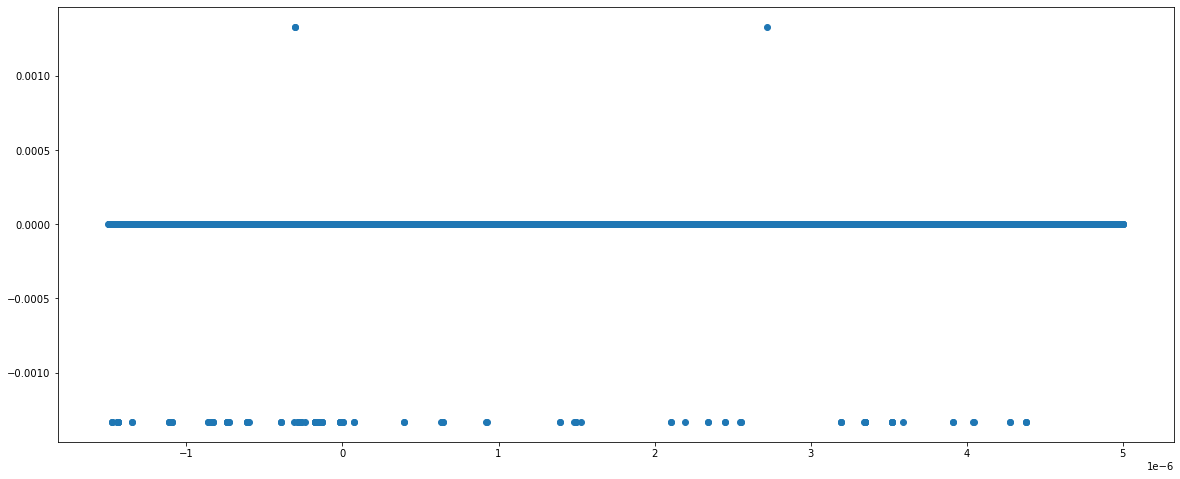

In [72]:
plt.figure(figsize = (20,8))
plt.scatter(t3[0],v3[0])

In [85]:
divsv1

[[30.0, 13.0, 10.0, 9.0, 7.0, 5.0, 3.0, 2.0, 1.0],
 [23.0, 21.0, 8.0, 7.0, 6.0, 4.0, 3.0, 2.0, 1.0],
 [28.0, 21.0, 18.0, 16.0, 15.0, 8.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
 [76.0, 26.0, 20.0, 18.0, 13.0, 12.0, 9.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]]

In [86]:
divsv2

[[74.0, 40.0, 18.0, 17.0, 13.0, 6.0, 4.0, 3.0, 2.0, 1.0],
 [30.0, 21.0, 15.0, 12.0, 9.0, 5.0, 4.0, 3.0, 2.0, 1.0],
 [31.0, 30.0, 21.0, 13.0, 12.0, 9.0, 8.0, 7.0, 5.0, 4.0, 3.0, 2.0, 1.0],
 [23.0, 20.0, 17.0, 12.0, 11.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]]

In [87]:
divsv3

[[1.0],
 [50.0, 41.0, 14.0, 13.0, 12.0, 11.0, 8.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
 [9.0, 5.0, 4.0, 3.0, 2.0, 1.0],
 [1.0]]

In [65]:
[val/dsv3[0][0] for val in dsv3[1]]

[5.0, 4.0, 11.0, 12.0, 14.0, 41.0, 50.0, 3.0, 13.0, 1.0, 2.0, 8.0, 6.0]